<a href="https://colab.research.google.com/github/nathalianetto/Data-Mining-in-credit-risk-analysis/blob/main/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTANDO BIBLIOTECAS E PREPARANDO AMBIENTE DE EXECUÇÃO

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier.classification_report import ClassificationReport

pd.set_option('display.max_columns', None)

In [ ]:
#LENDO A BASE DE DADOS

base = pd.read_csv("BASE PRE PROCESASDA.csv", encoding='latin-1',  sep=';')
base

,Sinistro,SCORE,RENDAPRESUMIDA,DISTANCIA CORRIGIDA,IDADE,TIPO_PROPOSTA,REGIAO,REGIAO_AGENTE,Tipo Canal,Cliente,BACEN,Meses rel com SFN,Prejuizo divida vencida,Status na base,Qtd IFs possui operacao,Qtd operacoeas a vencer,Qtd de operacoes baixadas,Qtd de operacoes do cliente no SFN,Qtd operacoes limite de credito,Qtd operacoes vencidas,Qtd modalidades da carteira de credito,Valor dívidas a vencer da pessoa em R$,Valor dívidas vencidas da pessoa em R$,Valor limite de crédito com vencimento acima de 360 dias,Valor limite de crédito com vencimento até 360 dias,Valor prejuizos da pessoa em R$,Valor operações a vencer até 30d,Valor operações a vencer até 31 a 60d,Valor operações a vencer até 61 a 90d,Valor operações a vencer até 91 a 180d,Valor operações a vencer até 181 a 360d,Valor operações a vencer até 361 a 720d,Valor operações a vencer até 721 a 1080d,Valor operações a vencer até 1081 a 1440d,Valor operações a vencer até 1441 a 1800d,Valor operações a vencer acima de 1801d,Valor dívidas a vencer da pessoa em R$ Adiantamento a depositantes,Valor dívidas a vencer da pessoa em R$ Coobrigações Fundos constitucionais,Valor dívidas a vencer da pessoa em R$ Coobrigações Garantias prestadas outras pessoas,Valor dívidas a vencer da pessoa em R$ Empréstimos Capital de Giro com Prazo de Vencimento até 365 dias,Valor dívidas a vencer da pessoa em R$ Empréstimos Capital de Giro com Prazo de Vencimento Superior 365 dias,Valor dívidas a vencer da pessoa em R$ Empréstimos cartão de crédito compra ou fatura parcelada,Valor dívidas a vencer da pessoa em R$ Empréstimos cartão de crédito não migrado,Valor dívidas a vencer da pessoa em R$ Empréstimos Cheque Especial,Valor dívidas a vencer da pessoa em R$ Empréstimos Crédito pessoal com consignação,Valor dívidas a vencer da pessoa em R$ Empréstimos Crédito pessoal sem consignação,Valor dívidas a vencer da pessoa em R$ Empréstimos Crédito rotativo a cartão de crédito,Valor dívidas a vencer da pessoa em R$ Empréstimos home equity,Valor dívidas a vencer da pessoa em R$ Empréstimos microcrédito,Valor dívidas a vencer da pessoa em R$ Empréstimos Outros empréstimos,Valor dívidas a vencer da pessoa em R$ Financ cartão de crédito compra ou fatura parcelada,Valor dívidas a vencer da pessoa em R$ Financiamentos Outros,Valor dívidas a vencer da pessoa em R$ Financiamentos Outros bens,Valor dívidas a vencer da pessoa em R$ Financiamentos Veículos,Valor dívidas a vencer da pessoa em R$ Financiamentos Vendor,Valor dívidas a vencer da pessoa em R$ Financiamentos imobiliários Carteira hipotecária,Valor dívidas a vencer da pessoa em R$ Financiamentos imobiliários Habitacional,Valor dívidas a vencer da pessoa em R$ Financiamentos rurais Custeio e précusteio,Valor dívidas a vencer da pessoa em R$ Outros cartão de crédito compra à vista e parcelado,Valor dívidas a vencer da pessoa em R$ Outros recebíveis mercantis adquiridos,Valor dívidas a vencer da pessoa em R$ Outros créditos Outros,Valor dívidas a vencer da pessoa em R$ Títulos descontados Outros títulos
0,1,549,2069,"2219,13",31,WEB,NORDESTE,SUDESTE,CANAL DIGITAL,NOVO,Não Consta Bacen,12.0,0,Com restrições,1,6,0,10,1,0,2,"2254,47",0,"7,35",0,0,"1493,74","435,05","54,28","162,84","108,56",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"61,82",0,0,0,0,0,0,0,0,0,0,0,"2192,65",0,0,0
1,1,505,1431,"592,43",25,APP,SUDESTE,SUDESTE,CORBAN,NOVO,Não Consta Bacen,84.0,0,Com restrições,8,34,0,14,1,0,6,"152024,25",0,0,"2568,4",0,"5874,53","3254,32","3145,62","8519,83","14992,23","16863,59","13307,68","12072,45","10408,92","63585,08",0,0,0,0,0,"3012,09",0,0,0,0,"1247,81",0,0,0,0,0,"9404,01","46660,52",0,0,"90924,2",0,"775,62",0,0,0
2,1,759,2027,"2452,85",67,APP,NORDESTE,SUL,CORBAN,NOVO,Não Consta Bacen,0.0,0,Nada consta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,692,3406,0,75,APP,CENTRO-OESTE,CENTRO-OESTE,CORBAN,RECOMPRA,Não Consta Bacen,239.0,0,Com restrições,5,12,0,18,2,0,3,"125486,48",0,"0,01","641,87",0,17783,"2555,87","2509,96","725

**Sinistro** é o indicador de inadimplência utilizado no projeto, sendo 1 o valor para representar o cliente inadimplente

In [ ]:
#DISCRETIZANDO VARIÁVEIS NUMÉRICAS CONTÍNUAS

colunas_float = ['SCORE', 'RENDAPRESUMIDA', 'DISTANCIA CORRIGIDA', 'IDADE',
       'Qtd IFs possui operacao', 'Qtd operacoeas a vencer', 'Meses rel com SFN',
       'Qtd de operacoes baixadas', 'Qtd de operacoes do cliente no SFN',
       'Qtd operacoes limite de credito', 'Qtd operacoes vencidas',
       'Qtd modalidades da carteira de credito',
       'Valor dívidas a vencer da pessoa em R$',
       'Valor dívidas vencidas da pessoa em R$',
       'Valor limite de crédito com vencimento acima de 360 dias',
       'Valor limite de crédito com vencimento até 360 dias',
       'Valor prejuizos da pessoa em R$', 'Valor operações a vencer até 30d',
       'Valor operações a vencer até 31 a 60d',
       'Valor operações a vencer até 61 a 90d',
       'Valor operações a vencer até 91 a 180d',
       'Valor operações a vencer até 181 a 360d',
       'Valor operações a vencer até 361 a 720d',
       'Valor operações a vencer até 721 a 1080d',
       'Valor operações a vencer até 1081 a 1440d',
       'Valor operações a vencer até 1441 a 1800d',
       'Valor operações a vencer acima de 1801d',
       'Valor dívidas a vencer da pessoa em R$  Adiantamento a depositantes',
       'Valor dívidas a vencer da pessoa em R$  Coobrigações  Fundos constitucionais',
       'Valor dívidas a vencer da pessoa em R$  Coobrigações  Garantias prestadas  outras pessoas',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Capital de Giro com Prazo de Vencimento até 365 dias',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Capital de Giro com Prazo de Vencimento Superior 365 dias',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  cartão de crédito  compra ou fatura parcelada',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  cartão de crédito  não migrado',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Cheque Especial',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Crédito pessoal com consignação',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Crédito pessoal sem consignação',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Crédito rotativo a cartão de crédito',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  home equity',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  microcrédito',
       'Valor dívidas a vencer da pessoa em R$  Empréstimos  Outros empréstimos',
       'Valor dívidas a vencer da pessoa em R$  Financ  cartão de crédito  compra ou fatura parcelada',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos  Outros',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos  Outros bens',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos  Veículos',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos  Vendor',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos imobiliários  Carteira hipotecária',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos imobiliários  Habitacional',
       'Valor dívidas a vencer da pessoa em R$  Financiamentos rurais  Custeio e précusteio',
       'Valor dívidas a vencer da pessoa em R$  Outros  cartão de crédito  compra à vista e parcelado',
       'Valor dívidas a vencer da pessoa em R$  Outros  recebíveis mercantis adquiridos',
       'Valor dívidas a vencer da pessoa em R$  Outros créditos  Outros',
       'Valor dívidas a vencer da pessoa em R$  Títulos descontados  Outros títulos']

for i in colunas_float:
  base[i] = base[i].astype(str)
  base[i] = base[i].str.replace(',','.')
  base[i] = base[i].astype(float)
  base[i] = pd.qcut(base[i], 4, labels=False, duplicates='drop')

In [ ]:
#CODIFICANDO VARIÁVEIS CATEGÓRICAS EM ENTRADAS NUMÉRICAS

base['PROPOSTA_WEB'] = base['TIPO_PROPOSTA'].astype(str)
base['PROPOSTA_WEB'] = base['PROPOSTA_WEB'].str.replace('WEB','1')
base['PROPOSTA_WEB'] = base['PROPOSTA_WEB'].str.replace('APP','0')
base['RECOMPRA'] = base['Cliente'].astype(str)
base['RECOMPRA'] = base['RECOMPRA'].str.replace('RECOMPRA','1')
base['RECOMPRA'] = base['RECOMPRA'].str.replace('NOVO','0')
base['CONSTA_BACEN'] = base['BACEN'].astype(str)
base['CONSTA_BACEN'] = base['CONSTA_BACEN'].str.replace('Não Consta Bacen','0')
base['CONSTA_BACEN'] = base['CONSTA_BACEN'].str.replace('Consta Bacen','1')
base['RESTRICOES'] = base['Status na base'].astype(str)
base['RESTRICOES'] = base['RESTRICOES'].str.replace('Com restrições','1')
base['RESTRICOES'] = base['RESTRICOES'].str.replace('Nada consta','0')
base.drop(columns={'TIPO_PROPOSTA', 'Cliente', 'BACEN', 'Status na base'}, inplace=True)

base['REGIAO'] = base['REGIAO'].astype(str)
base['REGIAO'] = base['REGIAO'].str.replace('SUL','1')
base['REGIAO'] = base['REGIAO'].str.replace('SUDESTE','2')
base['REGIAO'] = base['REGIAO'].str.replace('CENTRO-OESTE','3')
base['REGIAO'] = base['REGIAO'].str.replace('NORDESTE','4')
base['REGIAO'] = base['REGIAO'].str.replace('NORTE','5')
base['REGIAO_AGENTE'] = base['REGIAO_AGENTE'].astype(str)
base['REGIAO_AGENTE'] = base['REGIAO_AGENTE'].str.replace('SUL','1')
base['REGIAO_AGENTE'] = base['REGIAO_AGENTE'].str.replace('SUDESTE','2')
base['REGIAO_AGENTE'] = base['REGIAO_AGENTE'].str.replace('CENTRO-OESTE','3')
base['REGIAO_AGENTE'] = base['REGIAO_AGENTE'].str.replace('NORDESTE','4')
base['REGIAO_AGENTE'] = base['REGIAO_AGENTE'].str.replace('NORTE','5')
base['CANAL'] = base['Tipo Canal'].astype(str)
base['CANAL'] = base['CANAL'].str.replace('LOJA','1')
base['CANAL'] = base['CANAL'].str.replace('CANAL DIGITAL','2')
base['CANAL'] = base['CANAL'].str.replace('CORBAN','3')
base.drop(columns={'Tipo Canal'}, inplace=True)

In [ ]:
#BINARIZANDO COLUNA 'REGIAO' COM ONEHOT ENCODING

X = OneHotEncoder().fit_transform(base.REGIAO.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ['REGIAO_1', 'REGIAO_2', 'REGIAO_3', 'REGIAO_4', 'REGIAO_5'])
base = pd.concat([base, dfOneHot], axis=1)
base.drop(columns={'REGIAO'}, inplace=True)

In [ ]:
#BINARIZANDO COLUNA 'REGIAO_AGENTE' COM ONEHOT ENCODING

X1 = OneHotEncoder().fit_transform(base.REGIAO_AGENTE.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X1, columns = ['REGIAO_AG_1', 'REGIAO_AG_2', 'REGIAO_AG_3', 'REGIAO_AG_4', 'REGIAO_AG_5'])
base = pd.concat([base, dfOneHot], axis=1)
base.drop(columns={'REGIAO_AGENTE'}, inplace=True)

In [ ]:
#BINARIZANDO COLUNA 'CANAL' COM ONEHOT ENCODING

X2 = OneHotEncoder().fit_transform(base.CANAL.values.reshape(-1,1)).toarray()
dfOneHot2 = pd.DataFrame(X2, columns = ['CANAL_1', 'CANAL_2', 'CANAL_3'])
base = pd.concat([base, dfOneHot2], axis=1)
base.drop(columns={'CANAL'}, inplace=True)

In [ ]:
#PADRONIZANDO OS NOMES DAS COLUNAS E TIPO DOS DADOS PARA APLICAÇÃO DO MODELO

base.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
for i in base.columns:
  base[i] = base[i].astype(str)
  base[i] = base[i].str.replace(',','.')
  base[i] = base[i].astype(float)

In [ ]:
#VERIFICANDO COLINEARIDADE ENTRE VARIÁVEIS

from statsmodels.stats.outliers_influence import variance_inflation_factor
teste_VIF = base.drop(['Sinistro'], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = teste_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(teste_VIF.values, i)
                          for i in range(len(teste_VIF.columns))]
vif_data

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,SCORE,1.253591
1,RENDAPRESUMIDA,1.423441
2,DISTANCIA_CORRIGIDA,1.472718
3,IDADE,1.917909
4,Meses_rel_com_SFN,1.633054
...,...,...
66,REGIAO_AG_4,inf
67,REGIAO_AG_5,inf
68,CANAL_1,inf
69,CANAL_2,inf


In [ ]:
#VERIFICANDO COLINEARIDADE ENTRE VARIÁVEIS DESCONSIDERANDO AS DE MAIOR INFLUÊNCIA NO VIF (APÓS DIVERSOS TESTES)

from statsmodels.stats.outliers_influence import variance_inflation_factor
teste_VIF = base.drop(['Sinistro', 'REGIAO_AG_2', 'REGIAO_1', 'CANAL_3', 'CONSTA_BACEN', 'Valor_dívidas_a_vencer_da_pessoa_em_R$'], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = teste_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(teste_VIF.values, i)
                          for i in range(len(teste_VIF.columns))]
vif_data

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,SCORE,3.407031
1,RENDAPRESUMIDA,3.908390
2,DISTANCIA_CORRIGIDA,2.470591
3,IDADE,5.185692
4,Meses_rel_com_SFN,4.512687
...,...,...
61,REGIAO_AG_3,2.772770
62,REGIAO_AG_4,5.230960
63,REGIAO_AG_5,5.914580
64,CANAL_1,1.228552


In [ ]:
#EXCLUINDO COLUNAS DESCONSIDERADAS NA ÚLTIMA ANÁLISE DE VIF

base.drop(['REGIAO_AG_2', 'REGIAO_1', 'CANAL_3', 'CONSTA_BACEN', 'Valor_dívidas_a_vencer_da_pessoa_em_R$'], axis=1, inplace=True)

In [ ]:
#SEPARANDO BASES DE TREINO E TESTE

from sklearn.model_selection import train_test_split as tts
train, test = tts(base, stratify=base['Sinistro'], test_size=0.2, random_state=8)
train_x, train_y = train.drop(columns='Sinistro'), train['Sinistro']
test_x, test_y = test.drop(columns='Sinistro'), test['Sinistro']

In [ ]:
#APLICANDO NAIVE BAYES MULTINOMINAL PARA CLASSIFICAÇÃO BAYESIANA

from sklearn.naive_bayes import MultinomialNB
previsto = MultinomialNB().fit(train_x, train_y).predict(test_x)
real = pd.array(test_y)

0.6873126873126874

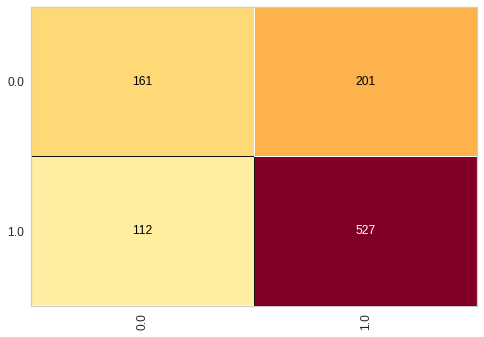

In [ ]:
#GERANDO MATRIZ DE CONFUSÃO DA CLASSIFICAÇÃO BAYESIANA

cm = ConfusionMatrix(MultinomialNB())
cm.fit(train_x, train_y)
cm.score(test_x, test_y)

In [ ]:
#GERANDO RELATÓRIO DE AVALIAÇÃO DE DESEMPENHO DA CLASSIFICAÇÃO BAYESIANA

print(classification_report(test_y, previsto))

              precision    recall  f1-score   support

         0.0       0.59      0.44      0.51       362
         1.0       0.72      0.82      0.77       639

    accuracy                           0.69      1001
   macro avg       0.66      0.63      0.64      1001
weighted avg       0.68      0.69      0.68      1001



In [ ]:
#APLICANDO SUPPORT VECTOR MACHINE

from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1, C = 5.0)
svm.fit(train_x, train_y)

SVC(C=5.0, random_state=1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7172827172827173

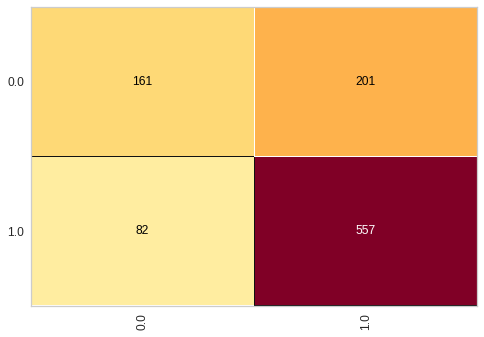

In [ ]:
#GERANDO MATRIZ DE CONFUSÃO DO SUPPORT VECTOR MACHINE

previsoes_svm = svm.predict(test_x)
cm_svm = ConfusionMatrix(svm)
cm_svm.fit(train_x, train_y)
cm_svm.score(test_x, test_y)

In [ ]:
#GERANDO RELATÓRIO DE AVALIAÇÃO DE DESEMPENHO DO SUPPORT VECTOR MACHINE

print(classification_report(test_y, previsoes_svm))

              precision    recall  f1-score   support

         0.0       0.66      0.44      0.53       362
         1.0       0.73      0.87      0.80       639

    accuracy                           0.72      1001
   macro avg       0.70      0.66      0.66      1001
weighted avg       0.71      0.72      0.70      1001



In [ ]:
#APLICANDO XGBOOST PARA CONSTRUÇÃO DE UMA ÁRVORE DE DECISÃO

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_x, train_y, early_stopping_rounds=10, eval_metric='logloss', eval_set=[(test_x, test_y)], verbose=True)
previsoes_XB = model.predict(test_x)

[0]	validation_0-logloss:0.676222
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.662508
[2]	validation_0-logloss:0.650908
[3]	validation_0-logloss:0.641898
[4]	validation_0-logloss:0.632808
[5]	validation_0-logloss:0.626404
[6]	validation_0-logloss:0.620026
[7]	validation_0-logloss:0.615037
[8]	validation_0-logloss:0.610901
[9]	validation_0-logloss:0.607368
[10]	validation_0-logloss:0.603387
[11]	validation_0-logloss:0.601035
[12]	validation_0-logloss:0.598729
[13]	validation_0-logloss:0.596355
[14]	validation_0-logloss:0.593791
[15]	validation_0-logloss:0.592519
[16]	validation_0-logloss:0.590545
[17]	validation_0-logloss:0.588814
[18]	validation_0-logloss:0.588382
[19]	validation_0-logloss:0.587433
[20]	validation_0-logloss:0.585604
[21]	validation_0-logloss:0.584257
[22]	validation_0-logloss:0.583368
[23]	validation_0-logloss:0.582394
[24]	validation_0-logloss:0.581336
[25]	validation_0-logloss:0.581092
[26]	validation_0-logloss:0.5796

In [ ]:
#GERANDO MATRIZ DE CONFUSÃO DO XGBOOST

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, previsoes_XB)

array([[150, 212],
       [ 75, 564]])

In [ ]:
#GERANDO RELATÓRIO DE AVALIAÇÃO DE DESEMPENHO DO XGBOOST

print(classification_report(test_y, previsoes_XB))

              precision    recall  f1-score   support

         0.0       0.67      0.41      0.51       362
         1.0       0.73      0.88      0.80       639

    accuracy                           0.71      1001
   macro avg       0.70      0.65      0.65      1001
weighted avg       0.71      0.71      0.69      1001



<Figure size 7200x216000 with 0 Axes>

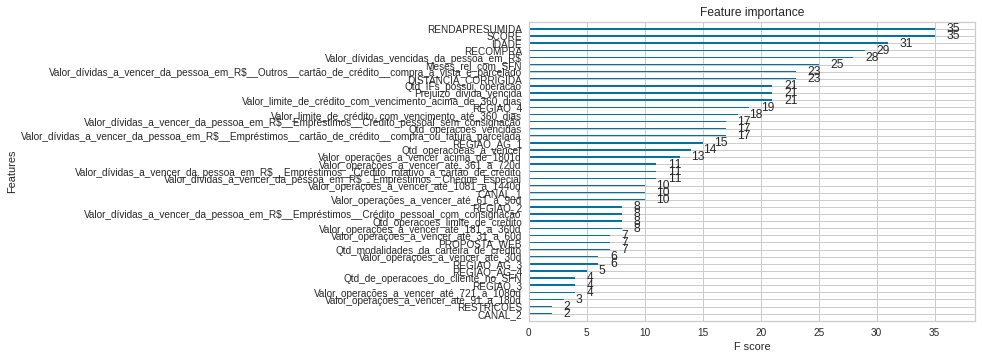

In [ ]:
#PLOTANDO COLUNAS POR GRAU DE IMPORTÂNCIA NO MODELO DO XGBOOST

from xgboost import plot_importance
from matplotlib import pyplot

pyplot.figure(figsize=(100,3000))
plot_importance(model)
pyplot.show()

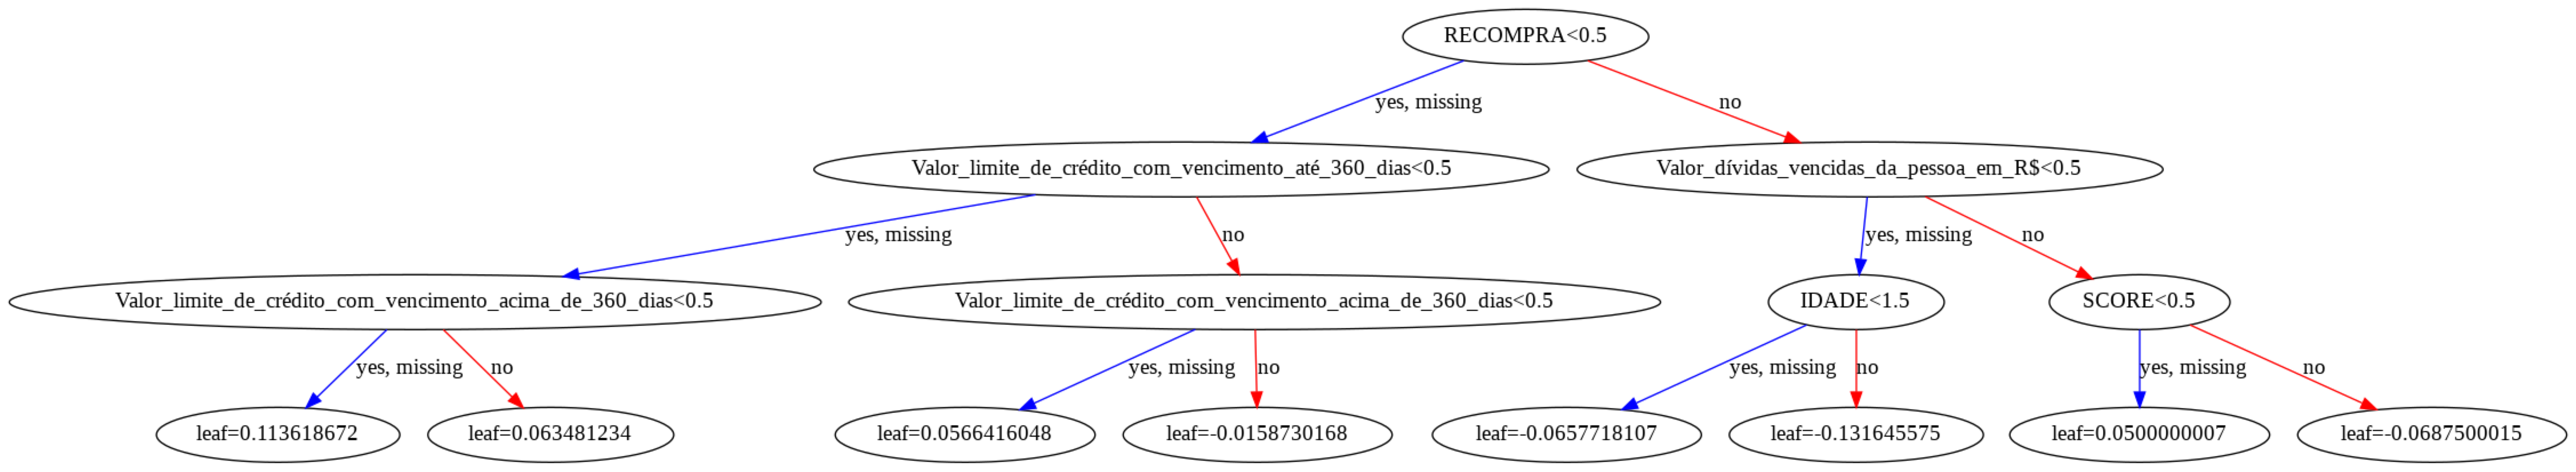

In [ ]:
#PLOTANDO ÁRVORE DE DECISÃO A PARTIR DOS RESULTADOS DO XGBOOST

from xgboost import plot_tree
pyplot.figure(figsize=(100,100))
plot_tree(model, ax=pyplot.gca())